# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [23]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [25]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [27]:
# Extract all rows of data
table = soup.find('table', class_ = 'table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [28]:
# Create an empty list
mars_data = []
# Capturing the headers
row_header = table.find_all('th')
headers = []
for row in row_header:
    headers.append(row.text)

# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')
for row in rows:
    data_tags = row.find_all('td')
    data_list = [data.text for data in data_tags]
    mars_data.append(data_list)
mars_data.remove(mars_data[0])
mars_data[0:5]

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']]

In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_data, columns = headers)

In [30]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [32]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [33]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [59]:
# 1. How many months are there on Mars?
mars_df['month'] = pd.to_numeric(mars_df['month'])
months = mars_df['month'].nunique()
unique_months = mars_df['month'].unique()
print(f'There are {months} unique months')
unique_months

There are 12 unique months


array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [60]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_df['sol'].count()
martian_days

1867

In [61]:
# 3. What is the average minimum temperature by month?
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
months_grouped = mars_df.groupby('month')['min_temp'].mean()
months_grouped

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

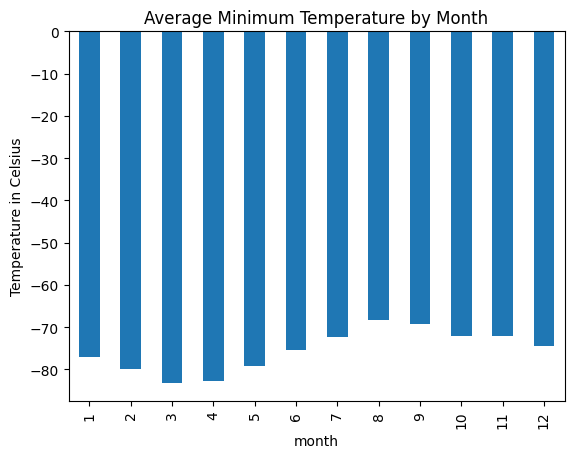

In [67]:
# Plot the average minimum temperature by month
months_grouped.plot.bar()
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Temperature in Celsius')
plt.show()

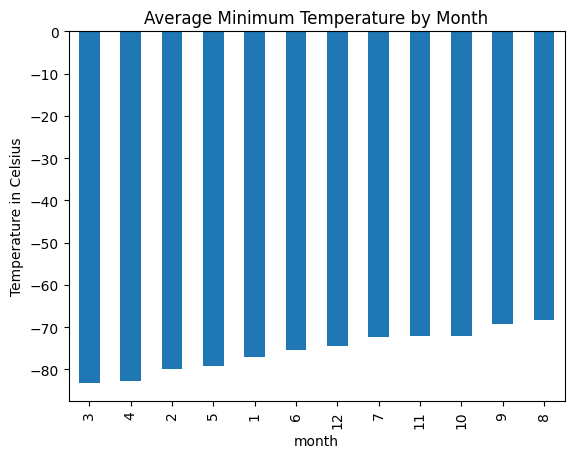

In [68]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_months = months_grouped.sort_values()
sorted_months.plot.bar()
plt.title('Average Minimum Temperature by Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [66]:
# 4. What is the average pressure by month?
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])
pressure_grouped = mars_df.groupby('month')['pressure'].mean()
pressure_grouped

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

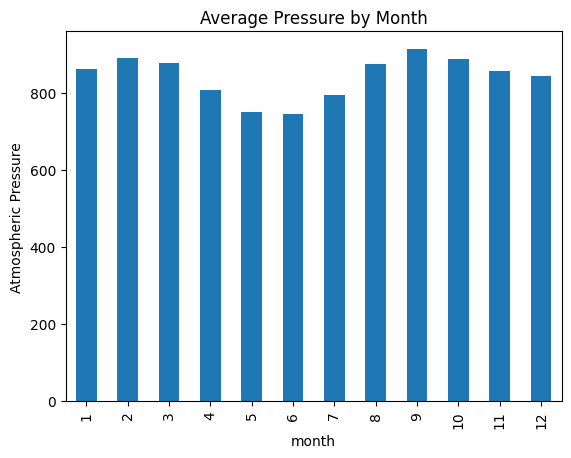

In [69]:
# Plot the average pressure by month
pressure_grouped.plot.bar()
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

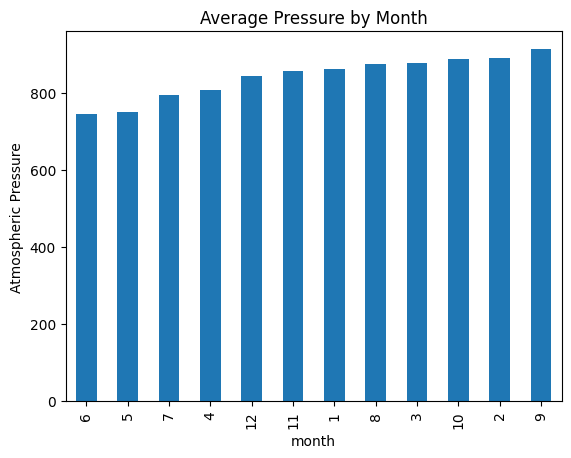

In [72]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = pressure_grouped.sort_values()
sorted_pressure.plot.bar()
plt.title('Average Pressure by Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

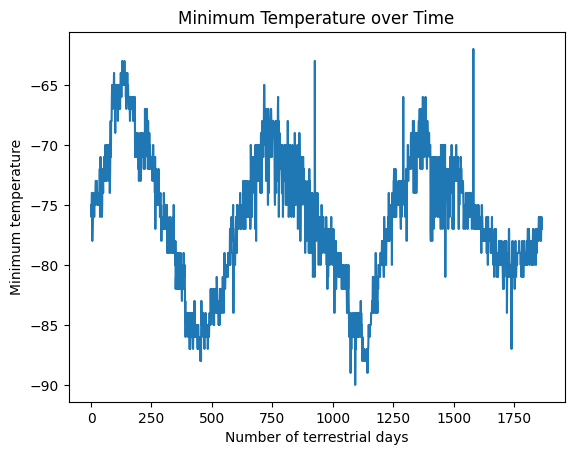

In [83]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(mars_df['sol'], mars_df['min_temp'])
x_label = ['0', '250', '500', '750', '1000', '1250', '1500', '1750']
x_ticks = [0, 250, 500, 750, 1000, 1250, 1500, 1750]
plt.xticks(x_ticks, x_label)
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

#### Minimum Temperature

The average colder temperatures take place during months 3, 4, and 2 which is March, April, and Feburary. This is similar to earths colder months. The average temperature in March (3) was -83.307292 degrees Celsius. The average temperature in April (4) was -82.747423 degrees Celsius. The average temperature in Feburary (2) was -79.932584 degrees Celsius.
The warmer averages were in months 8, 9, and 10 which is August, September, and October. This is also similar to Earth's warmer months. The average temperature in August (8) was -68.382979 degrees Celsius. The average temperature in September (9) was -69.171642 degrees Celsius. The average temperature in October (10) was -71.982143 degrees Celsius.

#### Atmospheric Pressure

The months with the lowest average pressure were 6, 5, and 7 which is June, May, and July. The average pressure in June (6) was 745.054422, in May (5) was 748.557047, and in July (7) was 795.105634. The months with the highest average pressure were 9, 2, and 10 which is September, Feburary, and October. The average pressure in September (9) was 913.305970, in Feburary (2) was 889.455056, and in October (10) was 887.312500. 

#### Year Length

The total number of Martian days since curiosity landed is 1867. That is a little over 5 years on earth. Based on the minimum temperature by number of terrestrial days, Mars goes through 3 cold periods and 3 warm periods in the span of a year. The time between those periods the temperature gradually starts to increase/decrease depending on the changing of temperature (hot to cold/cold to hot). It seems that some of the months coincide to the earth months temperatures, but given that 5 years on earth is 1 year on Mars shows that there is most likely a difference between some of the months temperatures. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [85]:
# Write the data to a CSV
mars_df.to_csv('mars_df', index=False)

In [86]:
browser.quit()